In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
import matplotlib
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

from datetime import datetime

import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima_model import ARIMA

In [2]:
total = pd.read_csv('total4.csv',parse_dates=["공급일자"])

In [3]:
total

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,월,요일
0,2018-01-02,220954944,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3829.0,매장A,NaN,10:32,1,화
1,2018-01-02,89023040,정상회원,채소,열매채소,단호박/손질,단호박(깍뚝썰기/300g),1.0,4977.0,매장A,NaN,10:41,1,화
2,2018-01-02,354941440,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083.0,매장A,NaN,11:00,1,화
3,2018-01-02,786634048,탈퇴,반찬,어묵/묵,묵,도토리묵(420g:1모),1.0,7083.0,매장A,NaN,11:28,1,화
4,2018-01-02,438543104,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083.0,매장A,NaN,11:59,1,화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292019,2018-10-31,560448896,정상회원,주곡,멥쌀,멥쌀,백미/유(2kg),1.0,15315.0,매장D,NaN,13:16,10,수
292020,2018-10-31,68976384,정상회원,채소,잎/줄기채소,시금치,시금치(300g),2.0,6892.0,매장D,NaN,11:08,10,수
292021,2018-10-31,1519813440,정상회원,반찬,밑반찬,김가공,구운자른김(15g*3봉),1.0,7466.0,매장D,NaN,14:27,10,수
292022,2018-10-31,654809792,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3733.0,매장D,NaN,16:02,10,수


In [4]:
prodA = total.loc[total.구매매장 == '매장A',['공급일자','물품명','구매수량']]
prodA

,공급일자,물품명,구매수량
0,2018-01-02,두부(1모:420g),1.0
1,2018-01-02,단호박(깍뚝썰기/300g),1.0
2,2018-01-02,유정란/매장용(10알/국내산),1.0
3,2018-01-02,도토리묵(420g:1모),1.0
4,2018-01-02,유정란/매장용(10알/국내산),1.0
...,...,...,...
52068,2018-10-31,무(0.7~1kg미만),1.0
52069,2018-10-31,쪽파(500g),1.0
52070,2018-10-31,우엉조림(반찬용/150g),1.0
52071,2018-10-31,감자바게트(180g)/매장,1.0


In [5]:
prodA.물품명

0             두부(1모:420g)
1          단호박(깍뚝썰기/300g)
2        유정란/매장용(10알/국내산)
3           도토리묵(420g:1모)
4        유정란/매장용(10알/국내산)
               ...       
52068        무(0.7~1kg미만)
52069            쪽파(500g)
52070      우엉조림(반찬용/150g)
52071      감자바게트(180g)/매장
52072            무(1kg이상)
Name: 물품명, Length: 52073, dtype: object

In [6]:
from collections import Counter
cnt = Counter(prodA.물품명)
cnt

Counter({'두부(1모:420g)': 1674,
         '단호박(깍뚝썰기/300g)': 15,
         '유정란/매장용(10알/국내산)': 416,
         '도토리묵(420g:1모)': 183,
         '수피아 기초2종모음/기존용기': 4,
         '대파(700g)': 152,
         '약과(200g/18개)': 52,
         '홍삼액(6년근/60봉)': 7,
         '편백나무큐브베개(성인/분홍잔꽃)': 1,
         '시금치(300g)': 308,
         '딸기잼(480g)': 109,
         '우엉조림(김밥용/150g)': 31,
         '연두부(100g)': 140,
         '양상추(300g:1통)': 101,
         '카스텔라(소:100g)/매장': 123,
         '유기쌀올리고당(440g)': 62,
         '찌개용두부(420g)': 685,
         '우리밀빵가루(190g)': 29,
         '자연그대로 남성용스킨(110㎖)': 8,
         '생표고버섯(300g)': 89,
         '과일푸딩(포도:110g)': 47,
         '찹쌀누룽지(300g)': 82,
         '동물복지유정란/중란(10알/국내산)': 53,
         '완숙토마토(1kg)': 112,
         '말랑말랑백미가래떡(400g)': 95,
         '적양배추(1통:600g이상)': 33,
         '달지않은 떠먹는요거트(90g*2개)': 9,
         '사과/(2kg)/중': 79,
         '팥죽(230g)': 35,
         '자연그대로 페이스동백오일': 32,
         '마른흑새우(200g)': 12,
         '양배추브로콜리액(100ml*30봉)': 57,
         '플레인요구르트(범산/450ml)': 159,
 

In [7]:
cnt.most_common(20)

[('두부(1모:420g)', 1674),
 ('콩나물(300g)', 864),
 ('유정란/매장용(15알/국내산)', 749),
 ('찌개용두부(420g)', 685),
 ('오이(3개)', 484),
 ('유정란/매장용(안심대안사료/15알)', 431),
 ('유정란/매장용(10알/국내산)', 416),
 ('중파(500g)', 397),
 ('양파(1kg)', 393),
 ('구운도시락김(5g*3봉)', 367),
 ('당근(500g)', 324),
 ('시금치(300g)', 308),
 ('애호박(1개)', 276),
 ('팽이버섯(150g)', 262),
 ('유기농우유(종이팩/900ml)', 256),
 ('깻잎(30장)', 231),
 ('유기농저지방우유(종이팩/900ml)', 198),
 ('명태참어묵(300g)', 193),
 ('유기농성이시돌목장우유(900ml)', 190),
 ('대파(500g)', 185)]

In [8]:
df_A = prodA.groupby(['공급일자','물품명'])['구매수량'].sum().unstack().fillna(0)
df_A

물품명,2단무늬컵(1p),7곡딸기롤과자(100g/10개입),7곡참식(700g),가리비(1.5kg),가리비(1kg),가마솥3인용,가시복분자원액(병:700ml),가시복분자즙(100ml*10봉),가시복분자즙(100ml*20봉),가시복분자즙(100ml/1봉),...,흑미참식(700g),흑방울토마토_500g,흑수박(토종/2~3kg),흑수박(토종/4~5kg),흑염소진액(100ml*30봉),흑임자구름떡(180g),흑임자인절미(150g),흑토마토(1kg),흑토마토(1kg/소),흰밀가루(1kg)
공급일자,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2018-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-10-28,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-10-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df_A = df_A.reset_index()

In [10]:
df_A.공급일자 = pd.to_datetime(df_A.공급일자)

In [11]:
df_A = df_A.set_index('공급일자')

In [12]:
df_A

물품명,2단무늬컵(1p),7곡딸기롤과자(100g/10개입),7곡참식(700g),가리비(1.5kg),가리비(1kg),가마솥3인용,가시복분자원액(병:700ml),가시복분자즙(100ml*10봉),가시복분자즙(100ml*20봉),가시복분자즙(100ml/1봉),...,흑미참식(700g),흑방울토마토_500g,흑수박(토종/2~3kg),흑수박(토종/4~5kg),흑염소진액(100ml*30봉),흑임자구름떡(180g),흑임자인절미(150g),흑토마토(1kg),흑토마토(1kg/소),흰밀가루(1kg)
공급일자,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2018-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-10-28,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-10-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
d1_df = df_A.resample('1D', how = np.sum).fillna(0)

/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


In [14]:
d1_df

물품명,2단무늬컵(1p),7곡딸기롤과자(100g/10개입),7곡참식(700g),가리비(1.5kg),가리비(1kg),가마솥3인용,가시복분자원액(병:700ml),가시복분자즙(100ml*10봉),가시복분자즙(100ml*20봉),가시복분자즙(100ml/1봉),...,흑미참식(700g),흑방울토마토_500g,흑수박(토종/2~3kg),흑수박(토종/4~5kg),흑염소진액(100ml*30봉),흑임자구름떡(180g),흑임자인절미(150g),흑토마토(1kg),흑토마토(1kg/소),흰밀가루(1kg)
공급일자,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2018-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-10-28,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-10-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
d3_df = df_A.resample('3D', how=np.sum).fillna(0)

/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


In [41]:
d3_df

물품명,2단무늬컵(1p),7곡딸기롤과자(100g/10개입),7곡참식(700g),가리비(1.5kg),가리비(1kg),가마솥3인용,가시복분자원액(병:700ml),가시복분자즙(100ml*10봉),가시복분자즙(100ml*20봉),가시복분자즙(100ml/1봉),...,흑미참식(700g),흑방울토마토_500g,흑수박(토종/2~3kg),흑수박(토종/4~5kg),흑염소진액(100ml*30봉),흑임자구름떡(180g),흑임자인절미(150g),흑토마토(1kg),흑토마토(1kg/소),흰밀가루(1kg)
공급일자,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2018-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2018-01-08,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-01-11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2018-01-14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-17,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-10-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-10-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [458]:
weekly_df = df_A.resample('W-Mon', how=np.sum).fillna(0)

/Users/sohee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


In [459]:
weekly_df

물품명,2단무늬컵(1p),7곡딸기롤과자(100g/10개입),7곡참식(700g),가리비(1.5kg),가리비(1kg),가마솥3인용,가시복분자원액(병:700ml),가시복분자즙(100ml*10봉),가시복분자즙(100ml*20봉),가시복분자즙(100ml/1봉),...,흑미참식(700g),흑방울토마토_500g,흑수박(토종/2~3kg),흑수박(토종/4~5kg),흑염소진액(100ml*30봉),흑임자구름떡(180g),흑임자인절미(150g),흑토마토(1kg),흑토마토(1kg/소),흰밀가루(1kg)
공급일자,,,,,,,,,,,,,,,,,,,,,
2018-01-08,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2018-01-15,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0
2018-01-22,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
2018-01-29,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,16.0,3.0,4.0,0.0,0.0,0.0
2018-02-05,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0
2018-02-12,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,3.0
2018-02-19,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2018-02-26,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0
2018-03-05,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0


In [42]:
train_size = 0.9
len_idx = len(d3_df.index)
mask = (np.arange(len_idx)/len_idx)<train_size
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False])

In [43]:
df_A_train = d3_df[mask]
df_A_test = d3_df[~mask]
print("shape of train data: {}".format(df_A_train.shape))
print("shape of test data: {}".format(df_A_test.shape))

shape of train data: (91, 1969)
shape of test data: (10, 1969)


In [44]:
df_A_train.loc[:,'두부(1모:420g)']

공급일자
2018-01-02    20.0
2018-01-05    26.0
2018-01-08    33.0
2018-01-11    26.0
2018-01-14    21.0
              ... 
2018-09-17    24.0
2018-09-20    39.0
2018-09-23     8.0
2018-09-26    23.0
2018-09-29    23.0
Freq: 3D, Name: 두부(1모:420g), Length: 91, dtype: float64

In [45]:
df_A_test.loc[:,'두부(1모:420g)']

공급일자
2018-10-02    25.0
2018-10-05    15.0
2018-10-08    18.0
2018-10-11    21.0
2018-10-14    15.0
2018-10-17    25.0
2018-10-20    11.0
2018-10-23    19.0
2018-10-26    12.0
2018-10-29    23.0
Freq: 3D, Name: 두부(1모:420g), dtype: float64

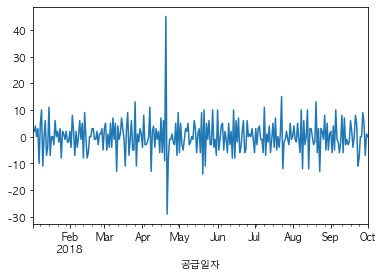

In [18]:
df_A_diff1 = df_A_train.loc[:,'두부(1모:420g)'] - df_A_train.loc[:,'두부(1모:420g)'].shift(1)
df_A_diff1.plot()

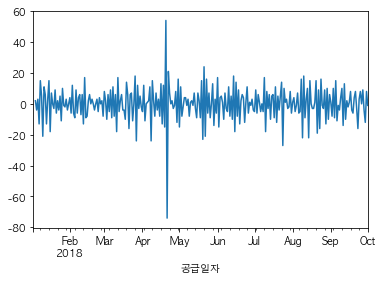

In [19]:
df_A_diff2 = df_A_train.loc[:,'두부(1모:420g)'] - 2*(df_A_train.loc[:,'두부(1모:420g)'].shift(1)) + df_A_train.loc[:,'두부(1모:420g)'].shift(2)
df_A_diff2.plot()

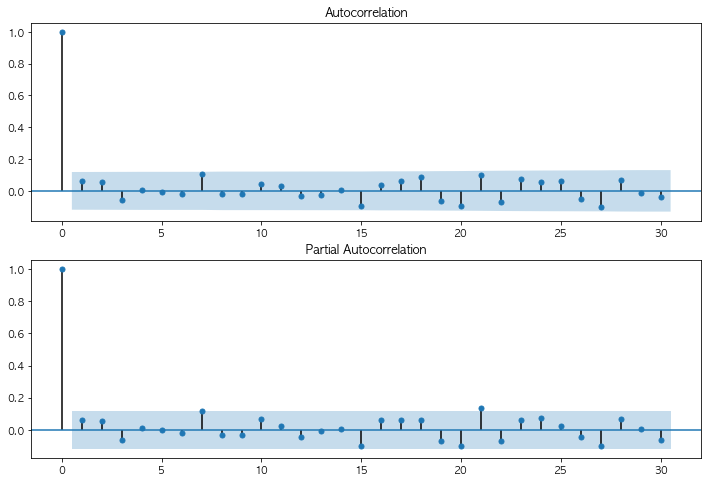

In [20]:
lag_size = 30
fig = plt.figure(figsize = (12,8))

ax1 = fig.add_subplot(211)
fig = plot_acf(df_A_train.loc[:,'두부(1모:420g)'], lags = lag_size, ax = ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df_A_train.loc[:,'두부(1모:420g)'], lags = lag_size, ax = ax2)

In [46]:
ts_model_cny = ARIMA(df_A_train.loc[:,'두부(1모:420g)'], order = (1,1,0))

ts_result_cny = ts_model_cny.fit(trend = "nc", full_output = True)
print(ts_result_cny.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.두부(1모:420g)   No. Observations:                   90
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -345.008
Method:                       css-mle   S.D. of innovations             11.165
Date:                Wed, 06 May 2020   AIC                            694.017
Time:                        20:36:51   BIC                            699.017
Sample:                    01-05-2018   HQIC                           696.033
                         - 09-29-2018                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
ar.L1.D.두부(1모:420g)    -0.5143      0.089     -5.757      0.000      -0.689      -0.339
                                    Roots                                    
                  Real    

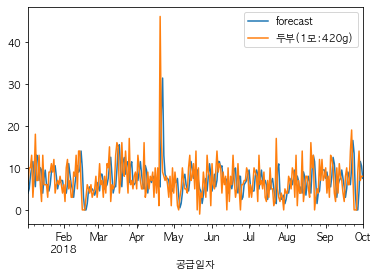

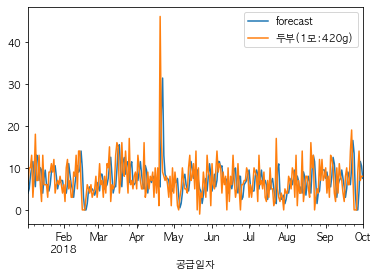

In [22]:
ts_result_cny.plot_predict()

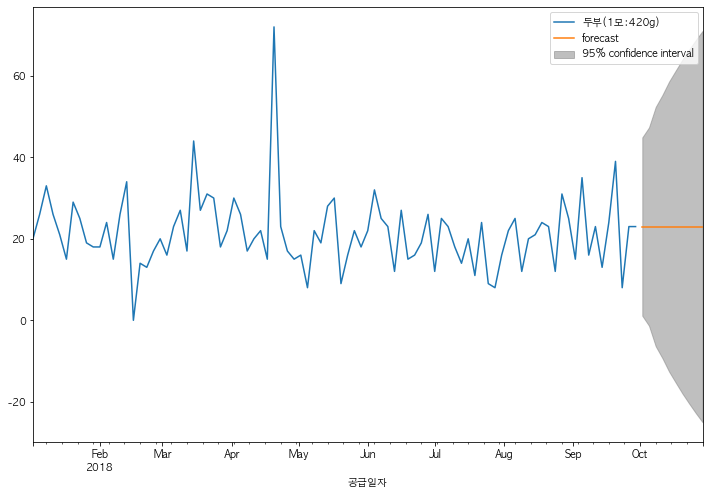

In [51]:
start_time = df_A_test.index.min()
end_time = df_A_test.index.max()
fig,ax = plt.subplots(figsize = (12,8))

ax =df_A_train.loc[:,'두부(1모:420g)'].plot(ax=ax)
fig = ts_result_cny.plot_predict(start = start_time, end = end_time, ax = ax, plot_insample = False)

In [28]:
start_time

Timestamp('2018-10-02 00:00:00')

In [31]:
start_time = pd.to_datetime("2018-01-03")
y_pred = ts_result_cny.predict(start = start_time, end = end_time, typ='levels')
df_merge = pd.DataFrame(d1_df.loc[:,'두부(1모:420g)'])
df_merge['예측값'] = y_pred
df_merge[-30:]

,두부(1모:420g),예측값
공급일자,,
2018-10-02,9.0,8.0
2018-10-03,3.0,8.0
2018-10-04,13.0,8.0
2018-10-05,1.0,8.0
2018-10-06,9.0,8.0
2018-10-07,5.0,8.0
2018-10-08,8.0,8.0
2018-10-09,3.0,8.0
2018-10-10,7.0,8.0


In [56]:
start_time = pd.to_datetime("2018-01-05")
y_pred = ts_result_cny.predict(start = start_time, end = end_time, typ='levels')
df_merge = pd.DataFrame(d3_df.loc[:,'두부(1모:420g)'])
df_merge['예측값'] = y_pred
df_merge[-10:]

,두부(1모:420g),예측값
공급일자,,
2018-10-02,25.0,23.0
2018-10-05,15.0,23.0
2018-10-08,18.0,23.0
2018-10-11,21.0,23.0
2018-10-14,15.0,23.0
2018-10-17,25.0,23.0
2018-10-20,11.0,23.0
2018-10-23,19.0,23.0
2018-10-26,12.0,23.0


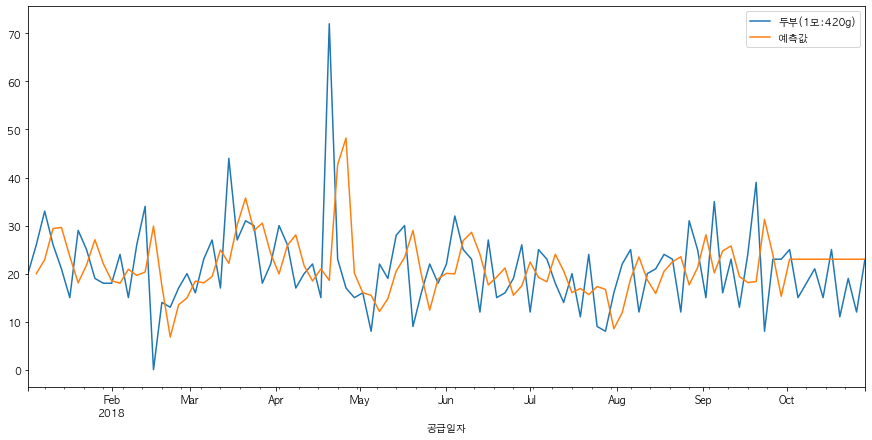

In [57]:
df_merge.plot(y=['두부(1모:420g)',"예측값"], figsize = (15,7))

In [28]:
fore = ts_result_cny.forecast(steps=1)
print(fore)

(array([8.]), array([5.50965658]), array([[-2.79872846, 18.79872846]]))


In [29]:
df_A_test[['두부(1모:420g)']]

물품명,두부(1모:420g)
공급일자,
2018-10-02,9.0
2018-10-03,3.0
2018-10-04,13.0
2018-10-05,1.0
2018-10-06,9.0
2018-10-07,5.0
2018-10-08,8.0
2018-10-09,3.0
2018-10-10,7.0


In [30]:
df_A_train.loc[:,'콩나물(300g)']

공급일자
2018-01-02    3.0
2018-01-03    3.0
2018-01-04    4.0
2018-01-05    1.0
2018-01-06    5.0
             ... 
2018-09-27    3.0
2018-09-28    4.0
2018-09-29    3.0
2018-09-30    1.0
2018-10-01    2.0
Freq: D, Name: 콩나물(300g), Length: 273, dtype: float64

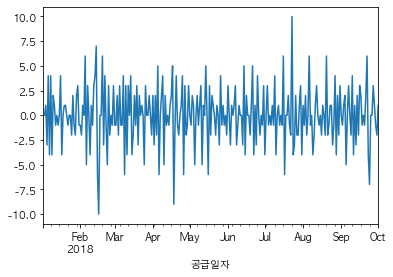

In [33]:
df_A_diff1 = df_A_train.loc[:,'콩나물(300g)'] - df_A_train.loc[:,'콩나물(300g)'].shift(1)
df_A_diff1.plot()

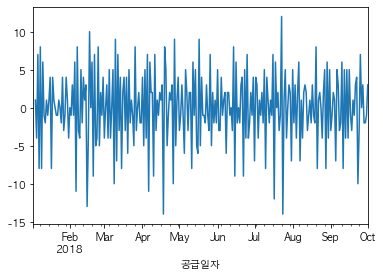

In [34]:
df_A_diff2 = df_A_train.loc[:,'콩나물(300g)'] - 2*(df_A_train.loc[:,'콩나물(300g)'].shift(1)) + df_A_train.loc[:,'콩나물(300g)'].shift(2)
df_A_diff2.plot()

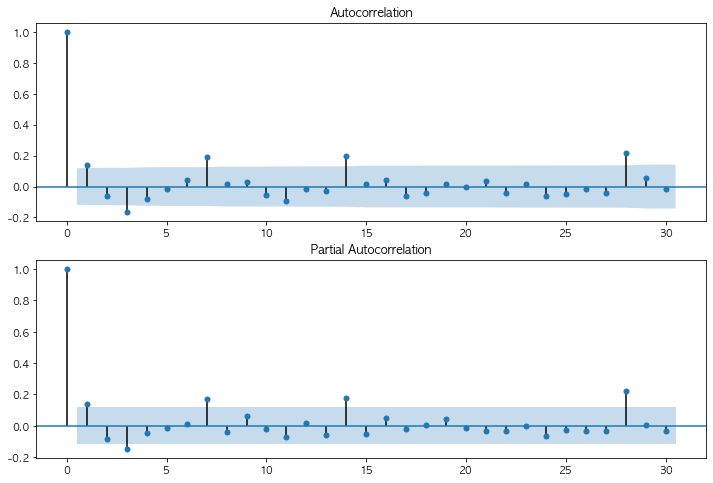

In [35]:
lag_size = 30
fig = plt.figure(figsize = (12,8))

ax1 = fig.add_subplot(211)
fig = plot_acf(df_A_train.loc[:,'콩나물(300g)'], lags = lag_size, ax = ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df_A_train.loc[:,'콩나물(300g)'], lags = lag_size, ax = ax2)

In [36]:
ts_model_cny = ARIMA(df_A_train.loc[:,'콩나물(300g)'], order = (1,1,0))

ts_result_cny = ts_model_cny.fit(trend = "nc", full_output = True)
print(ts_result_cny.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.콩나물(300g)   No. Observations:                  272
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -649.079
Method:                       css-mle   S.D. of innovations              2.630
Date:                Wed, 06 May 2020   AIC                           1302.158
Time:                        20:31:55   BIC                           1309.369
Sample:                    01-03-2018   HQIC                          1305.053
                         - 10-01-2018                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
ar.L1.D.콩나물(300g)    -0.3825      0.056     -6.848      0.000      -0.492      -0.273
                                    Roots                                    
                  Real          

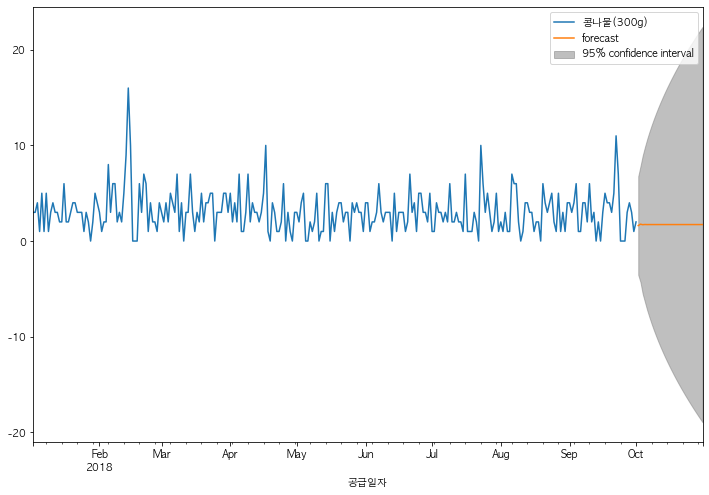

In [37]:
start_time = df_A_test.index.min()
end_time = df_A_test.index.max()
fig,ax = plt.subplots(figsize = (12,8))

ax =df_A_train.loc[:,'콩나물(300g)'].plot(ax=ax)
fig = ts_result_cny.plot_predict(start = start_time, end = end_time, ax = ax, plot_insample = False)

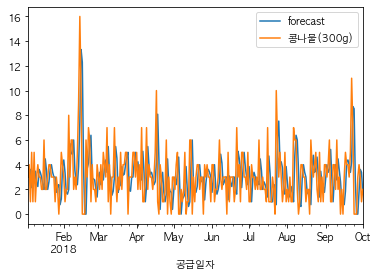

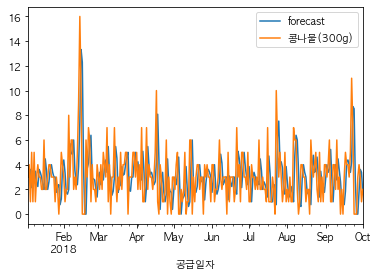

In [38]:
ts_result_cny.plot_predict()

In [553]:
start_time = pd.to_datetime("2018-01-05")
y_pred = ts_result_cny.predict(start = start_time, end = end_time, typ='levels')
df_merge = pd.DataFrame(d3_df.loc[:,'콩나물(300g)'])
df_merge['예측값'] = y_pred
df_merge

,콩나물(300g),예측값
공급일자,,
2018-01-02,10.0,NaN
2018-01-05,7.0,10.000000
2018-01-08,9.0,8.967781
2018-01-11,10.0,7.688146
2018-01-14,10.0,9.344073
...,...,...
2018-10-17,4.0,6.364562
2018-10-20,5.0,6.416801
2018-10-23,6.0,6.382536


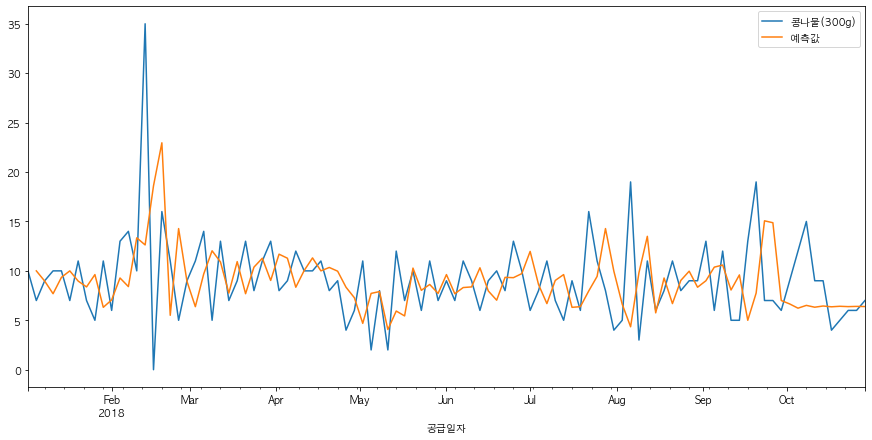

In [554]:
df_merge.plot(y=['콩나물(300g)',"예측값"], figsize = (15,7))

In [538]:
ts_model_cny = ARIMA(df_A_train.loc[:,'구운도시락김(5g*3봉)'], order = (1,1,0))

ts_result_cny = ts_model_cny.fit(trend = "nc", full_output = True)
print(ts_result_cny.summary())

                             ARIMA Model Results                              
Dep. Variable:        D.구운도시락김(5g*3봉)   No. Observations:                   90
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -271.845
Method:                       css-mle   S.D. of innovations              4.954
Date:                Tue, 28 Apr 2020   AIC                            547.690
Time:                        10:59:47   BIC                            552.690
Sample:                    01-05-2018   HQIC                           549.706
                         - 09-29-2018                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
ar.L1.D.구운도시락김(5g*3봉)    -0.4789      0.094     -5.085      0.000      -0.664      -0.294
                                    Roots                                    
                  Re

In [539]:
start_time = pd.to_datetime("2018-01-08")
y_pred = ts_result_cny.predict(start = start_time, end = end_time, typ='levels')
df_merge = pd.DataFrame(d3_df.loc[:,'구운도시락김(5g*3봉)'])
df_merge['예측값'] = y_pred
df_merge

,구운도시락김(5g*3봉),예측값
공급일자,,
2018-01-02,14.0,NaN
2018-01-05,7.0,NaN
2018-01-08,11.0,10.352450
2018-01-11,10.0,9.084315
2018-01-14,9.0,10.478921
...,...,...
2018-10-17,6.0,9.120684
2018-10-20,2.0,9.068674
2018-10-23,4.0,9.093583


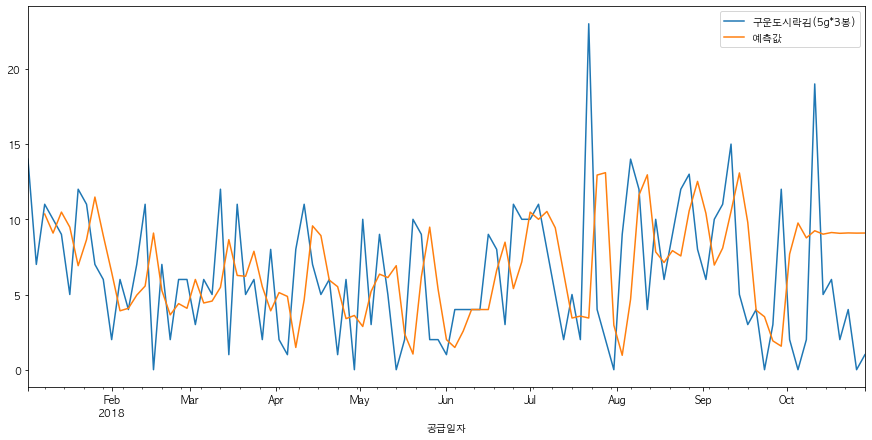

In [540]:
df_merge.plot(y=['구운도시락김(5g*3봉)',"예측값"], figsize = (15,7))